# Linear Algebra: Assignment 1

**Name**: (Please add your name here)


This assignment has 3 questions. These questions are worth 15 points each.

Please be aware that each of the questions below will involve writing code. As previously mentioned, we expect all code written for this class to reflect good coding standards.

In [118]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

**Question 1**

One of the operations that you will encounter frequently throughout this course is matrix multiplication.

As mentioned, the matrix multplication operation takes two matrices ($A$ and $B$) and outputs a new matrix ($C$). It requires that $A$ be an $n \times k$ matrix and $B$ be a $k \times m$ matrix with the result, $C$, being an $n \times m$ matrix.

Write a function that takes two matrices as an input and outputs their matrix product. This function should raise an error if the input matrices are incompatible. Use your function on the matrices created below and check that it performs the correct operation by comparing to the `numpy` solution.

In [ ]:
# Write your function here

In [ ]:
A = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
B = np.array([[1.0, 0.0], [2.0, 1.0], [3.0, 2.0]])

# Use your function here to multiply A and B and compare to numpy


In [ ]:
X = np.random.randn(10, 3)
Y = np.random.randn(3, 5)

# Use your function here to multiply X and Y and compare to numpy


**Question 2**

The logistic curve is frequently used to model growth in systems with a limiting size factor. It is defined by a differential equation,

$$\frac{\partial P}{\partial t} = r P \left(1 - \frac{P}{K} \right)$$

the solution to this differential equation is given by

$$P(t) = \frac{K}{1 + \left(\frac{K - P_0}{P_0}\right) e^{-rt}}$$

Let's play with these parameters a  little bit. Define a function that computes the values of $P$ for $t=0, 1, \dots, 500$ for given parameters $K$, $P_0$, $r$.

In [116]:
def logistic_curve_simulation(P0, K, r, T=500):
    """
    Simulates the logistic curve for a given parameterization from
    t=0 to t=T
    
    Parameters
    ----------
    P0 : scalar
        The initial size of the modeled process
    K : scalar
        The limiting size of the modeled process
    r : scalar
        The growth rate
    
    Returns
    -------
    simulated : np.array(ndim=1)
        The simulated process
    """
    Tvals = np.arange(T)
    simulated = K / (1 + ((K - P0)/P0)*np.exp(-r*Tvals))
    return simulated


Now that you can simulate the process, let's choose a particular $K$ and $P_0$ and plot the process for different values of $r$.

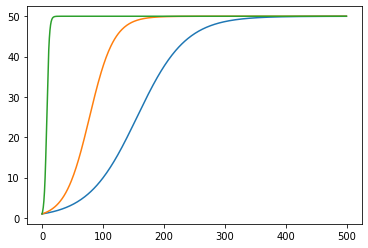

In [121]:
fig, ax = plt.subplots()

K, P0, T = 50.0, 1.0, 500

Tvals = np.arange(T)
for r in [0.025, 0.05, 0.5]:
    ax.plot(Tvals, logistic_curve_simulation(P0, K, r, T))


Which curves do you think correspond to each growth rate?

**Answer question here**

**Question 3**

This one is somewhat challenging. Take your best shot at it, we will award full points for a reasonable attempt.

We would like you to write the code to perform the QR-decomposition. Recall that the QR-decomposition of an $m \times n$ matrix, $A$, results in

$$A = QR$$

We will walk you through the steps:

*Step 1: Create a normalization function*

In this step, you will define a function, `normalize_col`, that will take the elements of a row and make it so that they sum to one.

This is done by dividing the vector by its norm. For a vector $x$, the normalized vector, $e$, is given by

$$e = \frac{x}{||x||}$$

where $||x|| := \sqrt{x_1^2 + x_2^2 + \dots + x_N^2}$

In [90]:
def normalize_col(x):
    """
    Normalizes the column so that the elements of the column sum to one
    
    Parameters
    ----------
    x : np.array(ndim=1)
        The column that we would like to normalize
    
    Returns
    -------
    out : np.array(ndim=1)
        The normalized version of x
    """
    out = x / np.sqrt(np.dot(x, x))
    
    return out


*Step 2: Create an projection function*

In this step, you will create a function, `proj_a2b`, that takes two vectors, $a$ and $b$, and projects $a$ onto $b$. Once we've done this projection, then the vector $a - \text{proj}_ba$ will be orthogonal to $b$.

The projection is defined as

$$\text{proj}_b a := \frac{\left<a, b\right>}{\left<b, b\right>}b$$

where $\left<x, y\right>$ is defined as the inner-product (for vectors, this is just the dot product)

In [91]:
def proj_a2b(a, b):
    """
    Projects the vector a onto the vector u
    
    Parameters
    ----------
    a : np.array(ndim=1)
        The vector we are projecting
    b : np.array(ndim=1)
        The vector we are projecting onto
    
    Returns
    -------
    out : np.array(ndim=1)
        The vector defined by projecting a onto b
    """
    out = b * (np.dot(a, b) / np.dot(b, b))

    return out


*Step 3: Create an orthogonalization function*

In this step, you will write a function, `orthogonalize`, that orthogonalizes one column relative to all columns prior to it in a matrix. It will depend on the `proj_a2b` function that you wrote in the previous step.

Recall that once we've projected $a$ onto $b$ that the vector $u := a - \text{proj}_b a$ will be orthogonal to $b$.

If we want column $n$ to be orthogonal to all previous columns then we could do this by:

$$A_n = A_n - \sum_{j=0}^{n-1} \text{proj}_{A_j} A_n$$

In [92]:
def orthogonalize(U, n):
    """
    Takes the matrix U and orthogonalizes the nth column
    relative to all previous columns
    
    Parameters
    ----------
    U : np.array(ndim=2)
        The matrix that should be orthogonalized
    n : int
        Which column is being orthogonalized
    
    Returns
    -------
    U : np.array(ndim=2)
        The matrix that is being orthogonalized but the nth column
        should be orthogonalized
    """
    for i in range(n):
        U[:, n] = U[:, n] - proj_a2b(U[:, n], U[:, i])

    return U


Once you've done all of the previous steps, we can perform the QR-decomposition using the function below

In [93]:
def qr_decomposition(A):
    """
    Performs the QR decomposition on a square matrix A such that
    
      A = Q R    

    Parameters
    ----------
    A : np.array(ndim=2)
        The matrix that should decomposed
    
    Returns
    -------
    Q : np.array(ndim=2)
        An orthonormal matrix
    R : np.array(ndim=2)
        An upper-diagonal matrix
    """
    # Make sure we get a Q of the right shape
    m, n = A.shape
    assert m == n

    # Allocate space to store the Q matrix
    Q = np.copy(A)
    
    Q[:, 0] = normalize_col(A[:, 0])
    for i in range(1, m):
        Q = orthogonalize(Q, i)
        Q[:, i] = normalize_col(Q[:, i])

    R = Q.T @ A
    
    return Q, R

Now let's create a matrix and check how our solution compares to the `scipy` version:

In [100]:
A = np.array([[1.0, 0.5, 0.2], [0.5, 0.5, 1.0], [0.0, 1.0, 1.0]])

In [101]:
Q, R = qr_decomposition(A)

In [105]:
from scipy.linalg import qr

In [106]:
Q_scipy, R_scipy = qr(A)

In [110]:
print("Our Q is")
print(Q)
print("Our R is")
print(R)

Our Q is
[[ 0.89442719 -0.09759001 -0.43643578]
 [ 0.4472136   0.19518001  0.87287156]
 [ 0.          0.97590007 -0.21821789]]
Our R is
[[ 1.11803399e+00  6.70820393e-01  6.26099034e-01]
 [-1.11022302e-16  1.02469508e+00  1.15156209e+00]
 [ 5.55111512e-17  2.77555756e-17  5.67366515e-01]]


In [111]:
print("Scipy's Q is")
print(Q_scipy)
print("Scipy'sR is")
print(R_scipy)

Scipy's Q is
[[-0.89442719  0.09759001  0.43643578]
 [-0.4472136  -0.19518001 -0.87287156]
 [-0.         -0.97590007  0.21821789]]
Scipy'sR is
[[-1.11803399 -0.67082039 -0.62609903]
 [ 0.         -1.02469508 -1.15156209]
 [ 0.          0.         -0.56736651]]


How do the two solutions differ?

**Write your observations about the differences here**:

Please note that in practice, we will **not** write our own functions to do scientific or linear algebra operations. Others have written versions that are (1) more general, (2) have better error catching, and (3) perform significantly better. For example, let's compare the speed of our QR decomposition with the scipy version below.

In [112]:
A_big = np.random.randn(100, 100)

In [113]:
%timeit qr_decomposition(A_big)

41.4 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
%timeit qr(A_big)

1.5 ms ± 9.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
